# 5. Unsupervised Machine Learning: Clustering

1. Importing libraries and data and renaming columns
2. Data wrangling and cleaning 

        2.1 Creating a smaller dataframe
        2.2 Checking and amending data types
        2.3 Checking for NaN values
        2.4 Checking for null values

3. The elbow technique
4. k-means clustering with thee clusters
5. Conclusion
6. Mean Shift Algorithm

### Importing libraries and data 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

In [3]:
#ensuring graphs are displayed without the need to "call" them specifically.
%matplotlib inline

In [6]:
path = r'C:\Users\rutha\CareerFoundry\04-23_EmployeeAttrition\02_Data'

In [7]:
df = pd.read_csv(os.path.join(path, 'Prepared_data', 'encoded_data.csv'))

In [8]:
df.shape

(49644, 37)

In [9]:
df.head()

,Unnamed: 0,country,department_name,terminationdate_key,age,length_of_service,job_title,store_number,year_of_record,population,...,large_country,medium_country,small_country,c_suite,associate,director,manager,older_adults,mid_adults,young_adults
0,0,Germany,Executive,01/01/1900,52,17,CEO,35,2006,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,Germany,Executive,01/01/1900,53,18,CEO,35,2007,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,Germany,Executive,01/01/1900,54,19,CEO,35,2008,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,Germany,Executive,01/01/1900,55,20,CEO,35,2009,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,Germany,Executive,01/01/1900,56,21,CEO,35,2010,83783942,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [10]:
#removing index
df.drop(columns='Unnamed: 0', inplace = True)

In [11]:
#checking output
df.head()

,country,department_name,terminationdate_key,age,length_of_service,job_title,store_number,year_of_record,population,pop_flag,...,large_country,medium_country,small_country,c_suite,associate,director,manager,older_adults,mid_adults,young_adults
0,Germany,Executive,01/01/1900,52,17,CEO,35,2006,83783942,large_country,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Germany,Executive,01/01/1900,53,18,CEO,35,2007,83783942,large_country,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Germany,Executive,01/01/1900,54,19,CEO,35,2008,83783942,large_country,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Germany,Executive,01/01/1900,55,20,CEO,35,2009,83783942,large_country,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Germany,Executive,01/01/1900,56,21,CEO,35,2010,83783942,large_country,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## 2. Data Wrangling

This is a very large dataset containing customer information for Instacart, an online grocery store, so I am going to need to wrangle the dataset:

    2.1 Creating a smaller dataframe
    2.2 Checking and amending data types
    2.3 Checking for NaN values
    2.4 Checking for null values

### 2.1 Creating a smaller dataframe

In [12]:
#checking columns
df.columns

Index(['country', 'department_name', 'terminationdate_key', 'age',
       'length_of_service', 'job_title', 'store_number', 'year_of_record',
       'population', 'pop_flag', 'gender', 'seniority', 'age_flag',
       'termreason_desc', 'termtype_desc', 'business_unit', 'gender.1',
       'employment_status', 'business_unit.1', 'Not Applicable', 'Retirement',
       'Resignaton', 'Layoff', 'Not Applicable.1', 'Voluntary', 'Involuntary',
       'large_country', 'medium_country', 'small_country', 'c_suite',
       'associate', 'director', 'manager', 'older_adults', 'mid_adults',
       'young_adults'],
      dtype='object')

In [14]:
#creating small dataframe
df_small = df.drop(columns = ['country', 'department_name', 'terminationdate_key', 'job_title', 'store_number', 'pop_flag', 'gender', 'seniority', 'age_flag',
       'termreason_desc', 'termtype_desc', 'business_unit', 'gender.1', 'business_unit.1', 'Not Applicable', 'Retirement',
       'Resignaton', 'Layoff', 'Not Applicable.1', 'Voluntary', 'Involuntary',
       'large_country', 'medium_country', 'small_country', 'c_suite',
       'associate', 'director', 'manager', 'older_adults', 'mid_adults',
       'young_adults'])

In [15]:
df_small.head()

,age,length_of_service,year_of_record,population,employment_status
0,52,17,2006,83783942,0
1,53,18,2007,83783942,0
2,54,19,2008,83783942,0
3,55,20,2009,83783942,0
4,56,21,2010,83783942,0


### 2.2 Checking and amending datatypes

In [17]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49644 entries, 0 to 49643
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                49644 non-null  int64
 1   length_of_service  49644 non-null  int64
 2   year_of_record     49644 non-null  int64
 3   population         49644 non-null  int64
 4   employment_status  49644 non-null  int64
dtypes: int64(5)
memory usage: 1.9 MB


### 2.3 Checking for NaN values

In [18]:
df_small.isna()

,age,length_of_service,year_of_record,population,employment_status
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
49639,False,False,False,False,False
49640,False,False,False,False,False
49641,False,False,False,False,False
49642,False,False,False,False,False


**Observations:** No NaN values observed. 

### 2.4 Checking for null values

In [19]:
df_small.isnull().sum()

age                  0
length_of_service    0
year_of_record       0
population           0
employment_status    0
dtype: int64

**Observations:** no null values observed.

## 3. The elbow technique

The elbow technique will allow us to understand the optimum number of clusters for our analyses

In [20]:
#defining the range of potential clusters in the data.
num_cl = range(1, 10) 

In [21]:
#defining k-means clusters for the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [25]:
#creating a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_small).score(df_small) for i in range(len(kmeans))] 

score

[-5.129058145219865e+19,
 -5.426725285346093e+18,
 -1.9016579413190886e+18,
 -9.2898552889619e+17,
 -3.4111846885195546e+17,
 -1.6417820855845648e+17,
 -9.739082520985333e+16,
 -6.089757680736589e+16,
 -3.2788874787214548e+16]

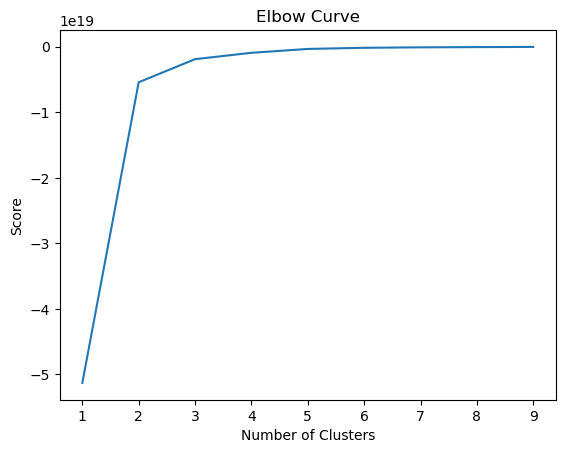

In [26]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Result:** the optimal number of clusters is **three**

## 4. k-means clustering with thee clusters

In [27]:
#creating the k-means object
kmeans = KMeans(n_clusters = 3) 

In [28]:
#fitting the k-means object to the data
kmeans.fit(df_small)

KMeans(n_clusters=3)

In [29]:
df_small['clusters'] = kmeans.fit_predict(df_small)

In [31]:
df_small.head()

,age,length_of_service,year_of_record,population,employment_status,clusters
0,52,17,2006,83783942,0,2
1,53,18,2007,83783942,0,2
2,54,19,2008,83783942,0,2
3,55,20,2009,83783942,0,2
4,56,21,2010,83783942,0,2


In [32]:
df_small['clusters'].value_counts()

0    25127
1    13306
2    11211
Name: clusters, dtype: int64

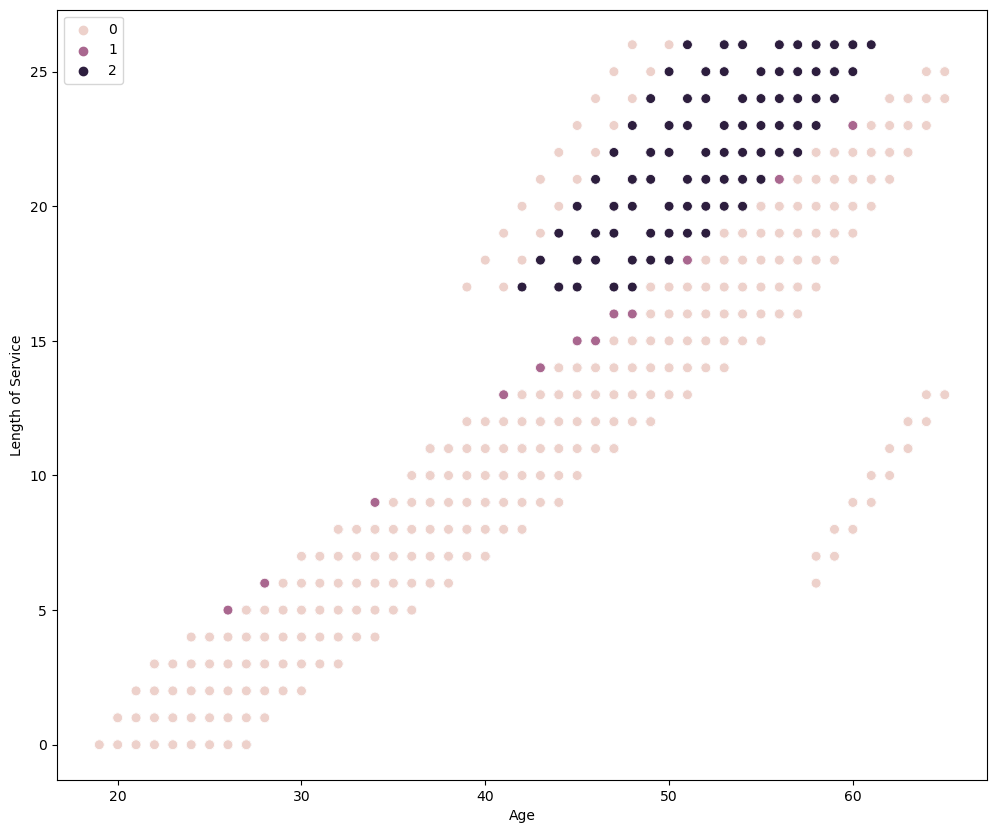

In [34]:
#plotting the clusters for the "prices" and "age" variables.

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=df_small['age'], y=df_small['length_of_service'], hue=kmeans.labels_, s=50) 

ax.grid(False) #removing grid background.
plt.xlabel('Age') #label x-axis.
plt.ylabel('Length of Service') #label y-axis.
plt.show()

**Results:** 

The most striking result when looking at the scatterplot above, is that there is a clear cluster of employees, coloured in dark purple, who are between ~42 and 60, and have been with the company for between 17 and 25 years. This shows that there is a relationship between age and tenure. 

When looking at the rest of the results, the distinctions are less clear. The majority of data points fall within the light purple cluster, and then there are a handful of darker coloured purple data points along the upper most level of the main trend of datapoints, however, they don't seem to have much in common. 

In [36]:
df_small.loc[df_small['clusters'] == 2, 'cluster'] = 'dark purple'
df_small.loc[df_small['clusters'] == 1, 'cluster'] = 'purple'
df_small.loc[df_small['clusters'] == 0, 'cluster'] = 'pink'

In [38]:
#looking at the statistics 
df_small.groupby('clusters').agg({'length_of_service':['mean', 'median'], 
                         'age':['mean', 'median']})

length_of_service               age       
                      mean median       mean median
clusters                                           
0                10.371990   10.0  41.957456   42.0
1                10.374643   10.0  42.018262   42.0
2                10.647221   10.0  42.416466   42.0

## 5. Conclusion

The k-means clustering broadly confirms our previous analysis that there is a link between age and lenght of service, the older you are, the more likely you are to stay with the company. 